### **Eficiencia Energética en los Edificios de la C.A. de Aragón.**

### **Acerca de los datos:**

Importación de Bibliotecas y Carga de Datos: Iniciamos el cuaderno importando las bibliotecas necesarias para nuestro análisis y procesamiento de datos. Luego, cargamos un conjunto de datos para su análisis.

### **Objetivos de este notebook:**
- Cargar datos
- Renombrar columnas
- Análisis inicial
- Manejo de valores faltantes
- Limpieza de datos
- Procesamiento de fechas
- Procesamiento de coordenadas
- Análisis de correlación
- Codificación de variables categóricas
- Visualización final
- Recomendaciones implementadas


### **Lectura de datos**

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Pedro Yacila/OneDrive/Escritorio/python_1/PYTHON_DATA_ANALYTICS/DATA_1/energia_aragon.csv_P2/energia_aragon.csv")
df.head()

,numcert,fec_emision,fec_expira,emision_co,clasificacion_emisiones,consumo_ener,clasificacion_consumo,tipoedi,estadoedi,anio,superficie,munic,prov,refcatastral,direccion,coordenadas
0,2013ZEVV-000000098,2013-06-29T00:00:00,2023-06-29T00:00:00,"30,11 kgCO2/m2 año",E,"142,33 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1962.0,49.0,ZARAGOZA,ZARAGOZA,5031112XM7153A0016BS/0,CL VILLAHERMOSA ( DUQUESA ) 3 Pl: 01 Pt: E,"674903,68 , 4612931,37"
1,2013ZEVV-000000104,2013-09-26T00:00:00,2023-09-26T00:00:00,"46,06 kgCO2/m2 año",E,"174,42 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1974.0,81.0,ZARAGOZA,ZARAGOZA,4131402XM7143A0226UZ/0,"CL GAMBRA, HERMANOS 2 Es: 1 Pl: 08 Pt: C","674062,96 , 4612970,24"
2,2014ZEVV-000000110,2014-02-26T00:00:00,2024-02-26T00:00:00,"20,3 kgCO2/m2 año",D,"94,16 kWh/m2 año",D,Bloque: Vivienda individual,Existente,1999.0,72.0,ZARAGOZA,ZARAGOZA,1922501XM7112D0015HT/0,CL ALGENIB VALDEFIERRO 11 Es: 1 Pl: 03 Pt: C,"671872,34 , 4612101,81"
3,2013ZEVV-000000121,2013-06-12T00:00:00,2023-06-12T00:00:00,"39,21 kgCO2/m2 año",E,"187,66 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1970.0,65.0,ZARAGOZA,ZARAGOZA,6236104XM7163E0094TF/0,CL ARCO SAN ILDEFONSO 2 Pl: 05 Pt: A,"676128,95 , 4613401,52"
4,2013ZEVV-000000124,2013-06-27T00:00:00,2023-06-27T00:00:00,"103,75 kgCO2/m2 año",G,"409,03 kWh/m2 año",G,Bloque: Vivienda individual,Existente,1965.0,46.0,ZARAGOZA,ZARAGOZA,4933114XM7143D0014UP/0,CL UNCETA 87 Pl: 04 Pt: C,"674806,83 , 4613067,64"


### **Descripción de la base de datos**

In [2]:
df.describe()

,anio,superficie
count,191829.000000,192145.000000
mean,1977.603762,1078.836225
std,42.518583,5530.371396
min,50.000000,0.000000
25%,1965.000000,63.000000
50%,1977.000000,86.000000
75%,2000.000000,194.100000
max,7936.000000,184470.440000


### **Información general**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192145 entries, 0 to 192144
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   numcert                  192145 non-null  object 
 1   fec_emision              192145 non-null  object 
 2   fec_expira               192145 non-null  object 
 3   emision_co               192145 non-null  object 
 4   clasificacion_emisiones  192145 non-null  object 
 5   consumo_ener             192145 non-null  object 
 6   clasificacion_consumo    192145 non-null  object 
 7   tipoedi                  192145 non-null  object 
 8   estadoedi                192145 non-null  object 
 9   anio                     191829 non-null  float64
 10  superficie               192145 non-null  float64
 11  munic                    192145 non-null  object 
 12  prov                     192145 non-null  object 
 13  refcatastral             192145 non-null  object 
 14  dire

#### **Diccionario de Renombramiento**

In [ ]:

renombrar_columnas = {
    'numcert': 'Numero_Certificado',
    'fec_emision': 'Fecha_emision',
    'fec_expira': 'Fecha_expiracion',
    'emision_co': 'Emision_CO2',
    'clasificacion_emisiones': 'Clasificacion_Emisiones',
    'consumo_ener': 'ConsumoKWh/m2/Anio',
    'clasificacion_consumo': 'Clasificacion_consumo',
    'tipoedi': 'Tipo_edificio',
    'estadoedi': 'Estado_edificio',
    'anio': 'Anio_construccion',
    'superficie': 'Superficie_m2',
    'munic': 'Municipio',
    'prov': 'Provincia',
    'refcatastral': 'Referencia_catastral',
    'direccion': 'Direccion',
    'coordenadas': 'Coordenadas_gps'
}


df = df.rename(columns=renombrar_columnas)
df


,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps
0,2013ZEVV-000000098,2013-06-29T00:00:00,2023-06-29T00:00:00,"30,11 kgCO2/m2 año",E,"142,33 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1962.0,49.00,ZARAGOZA,ZARAGOZA,5031112XM7153A0016BS/0,CL VILLAHERMOSA ( DUQUESA ) 3 Pl: 01 Pt: E,"674903,68 , 4612931,37"
1,2013ZEVV-000000104,2013-09-26T00:00:00,2023-09-26T00:00:00,"46,06 kgCO2/m2 año",E,"174,42 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1974.0,81.00,ZARAGOZA,ZARAGOZA,4131402XM7143A0226UZ/0,"CL GAMBRA, HERMANOS 2 Es: 1 Pl: 08 Pt: C","674062,96 , 4612970,24"
2,2014ZEVV-000000110,2014-02-26T00:00:00,2024-02-26T00:00:00,"20,3 kgCO2/m2 año",D,"94,16 kWh/m2 año",D,Bloque: Vivienda individual,Existente,1999.0,72.00,ZARAGOZA,ZARAGOZA,1922501XM7112D0015HT/0,CL ALGENIB VALDEFIERRO 11 Es: 1 Pl: 03 Pt: C,"671872,34 , 4612101,81"
3,2013ZEVV-000000121,2013-06-12T00:00:00,2023-06-12T00:00:00,"39,21 kgCO2/m2 año",E,"187,66 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1970.0,65.00,ZARAGOZA,ZARAGOZA,6236104XM7163E0094TF/0,CL ARCO SAN ILDEFONSO 2 Pl: 05 Pt: A,"676128,95 , 4613401,52"
4,2013ZEVV-000000124,2013-06-27T00:00:00,2023-06-27T00:00:00,"103,75 kgCO2/m2 año",G,"409,03 kWh/m2 año",G,Bloque: Vivienda individual,Existente,1965.0,46.00,ZARAGOZA,ZARAGOZA,4933114XM7143D0014UP/0,CL UNCETA 87 Pl: 04 Pt: C,"674806,83 , 4613067,64"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192140,2023ZETL-000177661,2023-12-26T00:00:00,2028-12-26T00:00:00,"179,85 kgCO2/m2 año",G,"1015,16 kWh/m2 año",G,Local,Existente,1965.0,25.42,ZARAGOZA,ZARAGOZA,7117905XM7171E0003US/0,CM PUENTE VIRREY 59 Pl: 00 Pt: 02,"677013,06 , 4611529,93"
192141,2023ZRVU-000177664,2023-11-24T00:00:00,2033-12-20T00:00:00,"18,68 kgCO2/m2 año",B,"86,84 kWh/m2 año",B,Unifamiliar,Proyecto Reforma,2013.0,329.99,ZARAGOZA,ZARAGOZA,4009312XM7140G0004PW/0,"CL ALVAREZ, MARCELINO 69 Es: G Pt: 03","673883,66 , 4610716,33"
192142,2023ZEVV-000177666,2023-12-22T00:00:00,2033-12-22T00:00:00,"42,27 kgCO2/m2 año",E,"202,82 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1977.0,100.86,ZARAGOZA,ZARAGOZA,4136708XM7143E0033RO/0,CL RIOJA 20 Pl: 04 Pt: 0B,"674059,02 , 4613464,77"
192143,2023TETL-000177667,2023-12-23T00:00:00,2033-12-23T00:00:00,40 kgCO2/m2 año,C,"236,15 kWh/m2 año",D,Local,Existente,2007.0,93.00,MORA DE RUBIELOS,TERUEL,1282426XK9518S0002WW/0,CL NUESTRA SEÑORA DE LORETO 2 Es: 1 Pl: 00 Pt: L1,"690986,45 , 4457882,06"


#### **Crear un nuevo DataFrame con las filas donde 'Anio_construccion' es NaN**

#### **Mostrar las primeras filas del nuevo DataFrame para revisión**

In [ ]:

df_valores_faltantes = df[df['Anio_construccion'].isna()]


df_valores_faltantes.head()

,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps
13,2013ZEVV-000000172,2013-06-11T00:00:00,2023-06-11T00:00:00,"28,69 kgCO2/m2 año",E,"135,52 kWh/m2 año",E,Bloque: Vivienda individual,Existente,NaN,67.88,ZARAGOZA,ZARAGOZA,0753608XM8105D0007UD/0,CL VALIENTE AZNAR S.( SIS ) 2 Es: 2 Pl: 01 Pt: A,"680680,1 , 4615100,44"
19,2014ZETL-000000016,2014-01-15T00:00:00,2024-01-15T00:00:00,"64,28 kgCO2/m2 año",C,"252,99 kWh/m2 año",C,Local,Existente,NaN,82.00,ZARAGOZA,ZARAGOZA,5141706XM7154C0161IA/0,"AV GARGALLO, PABLO 7 Pl: 00 Pt: 25","675295,85 , 4614111,93"
69,2014ZEVU-000000371,2014-04-09T00:00:00,2024-04-09T00:00:00,"60,19 kgCO2/m2 año",E,"264,39 kWh/m2 año",E,Unifamiliar,Existente,NaN,215.00,CUARTE DE HUERVA,ZARAGOZA,1766818XM7016N0013YK/0,CM PLANO 18 Es: E Pl: 00 Pt: 13,"671670,56 , 4606346,88"
78,2014ZEVV-000000445,2014-04-08T00:00:00,2024-04-08T00:00:00,"57,32 kgCO2/m2 año",E,"277,16 kWh/m2 año",F,Bloque: Vivienda individual,Existente,NaN,75.23,ZARAGOZA,ZARAGOZA,4738609XM7143H0028GA/0,AV NAVARRA 8 Pl: 09 Pt: OC,"674734,24 , 4613589,11"
359,2014ZEVB-000001498,2014-03-27T00:00:00,2024-03-27T00:00:00,"59,07 kgCO2/m2 año",E,"225,57 kWh/m2 año",E,Bloque completo,Existente,NaN,2396.00,ZARAGOZA,ZARAGOZA,7721126XM7172B0006QT/0,"CL CASTELAR, EMILIO 83 Pl: 01 Pt: B","677543,45 , 4611888,89"


#### **Valores Unicos Por Columnas**

In [71]:
valores_unicos_por_columna = df_valores_faltantes.nunique()
valores_unicos_por_columna

Numero_Certificado         283
Fecha_emision              207
Fecha_expiracion           207
Emision_CO2                276
Clasificacion_Emisiones      6
ConsumoKWh/m2/Anio         279
Clasificacion_consumo        7
Tipo_edificio                5
Estado_edificio              3
Anio_construccion            0
Superficie_m2              225
Municipio                   46
Provincia                    3
Referencia_catastral       316
Direccion                  316
Coordenadas_gps            267
dtype: int64

#### **Eliminando todas las filas con valores nulos en la columna Anio_Construccion**

In [8]:
df_sinanio = df.dropna(subset=['Anio_construccion'])
df_sinanio

,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps
0,2013ZEVV-000000098,2013-06-29T00:00:00,2023-06-29T00:00:00,"30,11 kgCO2/m2 año",E,"142,33 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1962.0,49.00,ZARAGOZA,ZARAGOZA,5031112XM7153A0016BS/0,CL VILLAHERMOSA ( DUQUESA ) 3 Pl: 01 Pt: E,"674903,68 , 4612931,37"
1,2013ZEVV-000000104,2013-09-26T00:00:00,2023-09-26T00:00:00,"46,06 kgCO2/m2 año",E,"174,42 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1974.0,81.00,ZARAGOZA,ZARAGOZA,4131402XM7143A0226UZ/0,"CL GAMBRA, HERMANOS 2 Es: 1 Pl: 08 Pt: C","674062,96 , 4612970,24"
2,2014ZEVV-000000110,2014-02-26T00:00:00,2024-02-26T00:00:00,"20,3 kgCO2/m2 año",D,"94,16 kWh/m2 año",D,Bloque: Vivienda individual,Existente,1999.0,72.00,ZARAGOZA,ZARAGOZA,1922501XM7112D0015HT/0,CL ALGENIB VALDEFIERRO 11 Es: 1 Pl: 03 Pt: C,"671872,34 , 4612101,81"
3,2013ZEVV-000000121,2013-06-12T00:00:00,2023-06-12T00:00:00,"39,21 kgCO2/m2 año",E,"187,66 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1970.0,65.00,ZARAGOZA,ZARAGOZA,6236104XM7163E0094TF/0,CL ARCO SAN ILDEFONSO 2 Pl: 05 Pt: A,"676128,95 , 4613401,52"
4,2013ZEVV-000000124,2013-06-27T00:00:00,2023-06-27T00:00:00,"103,75 kgCO2/m2 año",G,"409,03 kWh/m2 año",G,Bloque: Vivienda individual,Existente,1965.0,46.00,ZARAGOZA,ZARAGOZA,4933114XM7143D0014UP/0,CL UNCETA 87 Pl: 04 Pt: C,"674806,83 , 4613067,64"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192140,2023ZETL-000177661,2023-12-26T00:00:00,2028-12-26T00:00:00,"179,85 kgCO2/m2 año",G,"1015,16 kWh/m2 año",G,Local,Existente,1965.0,25.42,ZARAGOZA,ZARAGOZA,7117905XM7171E0003US/0,CM PUENTE VIRREY 59 Pl: 00 Pt: 02,"677013,06 , 4611529,93"
192141,2023ZRVU-000177664,2023-11-24T00:00:00,2033-12-20T00:00:00,"18,68 kgCO2/m2 año",B,"86,84 kWh/m2 año",B,Unifamiliar,Proyecto Reforma,2013.0,329.99,ZARAGOZA,ZARAGOZA,4009312XM7140G0004PW/0,"CL ALVAREZ, MARCELINO 69 Es: G Pt: 03","673883,66 , 4610716,33"
192142,2023ZEVV-000177666,2023-12-22T00:00:00,2033-12-22T00:00:00,"42,27 kgCO2/m2 año",E,"202,82 kWh/m2 año",E,Bloque: Vivienda individual,Existente,1977.0,100.86,ZARAGOZA,ZARAGOZA,4136708XM7143E0033RO/0,CL RIOJA 20 Pl: 04 Pt: 0B,"674059,02 , 4613464,77"
192143,2023TETL-000177667,2023-12-23T00:00:00,2033-12-23T00:00:00,40 kgCO2/m2 año,C,"236,15 kWh/m2 año",D,Local,Existente,2007.0,93.00,MORA DE RUBIELOS,TERUEL,1282426XK9518S0002WW/0,CL NUESTRA SEÑORA DE LORETO 2 Es: 1 Pl: 00 Pt: L1,"690986,45 , 4457882,06"


#### **Verficacion de datos sobre los valores nulos en todas las columnas**

In [9]:
df_sinanio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191829 entries, 0 to 192144
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Numero_Certificado       191829 non-null  object 
 1   Fecha_emision            191829 non-null  object 
 2   Fecha_expiracion         191829 non-null  object 
 3   Emision_CO2              191829 non-null  object 
 4   Clasificacion_Emisiones  191829 non-null  object 
 5   ConsumoKWh/m2/Anio       191829 non-null  object 
 6   Clasificacion_consumo    191829 non-null  object 
 7   Tipo_edificio            191829 non-null  object 
 8   Estado_edificio          191829 non-null  object 
 9   Anio_construccion        191829 non-null  float64
 10  Superficie_m2            191829 non-null  float64
 11  Municipio                191829 non-null  object 
 12  Provincia                191829 non-null  object 
 13  Referencia_catastral     191829 non-null  object 
 14  Direccion

#### **Realizamos las operaciones y seleccionamos las columnas de interés y mostramos las primeras filas**

In [ ]:
df_sinanio['Emision_CO2'] = df_sinanio['Emision_CO2'].str.replace(',', '.').str.extract('(\d+\.?\d*)').astype(float)
df_sinanio['ConsumoKWh/m2/Anio'] = df_sinanio['ConsumoKWh/m2/Anio'].str.replace(',', '.').str.extract('(\d+\.?\d*)').astype(float)


df_sinanio[['Emision_CO2', 'ConsumoKWh/m2/Anio']].head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\575495771.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_sinanio['Emision_CO2'] = df_sinanio['Emision_CO2'].str.replace(',', '.').str.extract('(\d+\.?\d*)').astype(float)
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\575495771.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_sinanio['ConsumoKWh/m2/Anio'] = df_sinanio['ConsumoKWh/m2/Anio'].str.replace(',', '.').str.extract('(\d+\.?\d*)').astype(float)
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\575495771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Emision_CO2,ConsumoKWh/m2/Anio
0,30.11,142.33
1,46.06,174.42
2,20.30,94.16
3,39.21,187.66
4,103.75,409.03


In [12]:
df_sinanio.describe()

,Emision_CO2,ConsumoKWh/m2/Anio,Anio_construccion,Superficie_m2
count,191829.000000,1.918290e+05,191829.000000,191829.000000
mean,186.948418,1.126733e+03,1977.603762,1079.599879
std,7640.796576,1.067385e+05,42.518583,5534.356927
min,0.000000,0.000000e+00,50.000000,0.000000
25%,37.220000,1.770600e+02,1965.000000,63.000000
50%,50.520000,2.387500e+02,1977.000000,86.000000
75%,66.510000,3.147600e+02,2000.000000,194.400000
max,571964.000000,4.433909e+07,7936.000000,184470.440000


Las variables Emision_CO2, Anio_construccion y Superficie_m2 presentan valores atípicos en sus máximos, por lo que se procederá a su tratamiento para corregir estas anomalías.

#### **Establecemos un umbral para cada columna donde identificamos valores atípicos**

In [ ]:
import pandas as pd
umbral_emision_CO2 = 300
umbral_anio_construccion = 2025
umbral_superficie = 5000

#### **Procedemos a remover los registros cuyos valores superan los límites definidos.**

In [ ]:
df_sinanio = df_sinanio[
    (df_sinanio['Emision_CO2'] < umbral_emision_CO2) &
    (df_sinanio['Anio_construccion'] < umbral_anio_construccion) &
    (df_sinanio['Superficie_m2'] < umbral_superficie)
]

#### **Verificamos los cambios** 

In [ ]:
df_sinanio.describe()

,Emision_CO2,ConsumoKWh/m2/Anio,Anio_construccion,Superficie_m2
count,179861.000000,179861.000000,179861.000000,179861.000000
mean,55.495461,336.236087,1976.940326,415.403838
std,28.205356,3396.535178,32.588791,902.002151
min,0.000000,0.000000,50.000000,0.000000
25%,37.700000,179.980000,1964.000000,62.000000
50%,51.090000,242.360000,1977.000000,83.000000
75%,67.100000,317.300000,2000.000000,146.000000
max,299.420000,347347.400000,2024.000000,4980.000000


La columna coordenadas está tipificada como un objeto. Si contiene valores separados por comas representando latitud y longitud, será necesario dividirla en dos columnas numéricas distintas.

#### **Se filtran únicamente las filas que presentan el formato adecuado en la columna Coordenadas_gps. Posteriormente, se divide esta columna en dos nuevas: Latitud y Longitud. Las cadenas vacías se reemplazan por valores nulos (NaN) y se realiza la conversión de los datos a formato numérico. Finalmente, se verifica que los cambios se hayan aplicado correctamente.**

In [72]:
import pandas as pd
import numpy as np

df_sinanio_filtrado = df_sinanio[df_sinanio['Coordenadas_gps'].str.count(',') == 1]
df_sinanio_filtrado[['Latitud', 'Longitud']] = df_sinanio_filtrado['Coordenadas_gps'].str.split(',', expand=True)
df_sinanio_filtrado['Latitud'] = pd.to_numeric(df_sinanio_filtrado['Latitud'].replace('', np.nan), errors='coerce')
df_sinanio_filtrado['Longitud'] = pd.to_numeric(df_sinanio_filtrado['Longitud'].replace('', np.nan), errors='coerce')
df_sinanio_filtrado[['Latitud', 'Longitud']].head()

C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\1374880394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio_filtrado[['Latitud', 'Longitud']] = df_sinanio_filtrado['Coordenadas_gps'].str.split(',', expand=True)
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\1374880394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio_filtrado[['Latitud', 'Longitud']] = df_sinanio_filtrado['Coordenadas_gps'].str.split(',', expand=True)
C:\Users\Pedro Yacila\AppData\Local\Temp\ipy

,Latitud,Longitud
498,NaN,NaN
599,NaN,NaN
3031,NaN,NaN
4777,NaN,NaN
4778,NaN,NaN


#### **Filtrando el datset la latitud y la longitud por anio**

In [ ]:

df_sinanio_filtrado = df_sinanio[(df_sinanio['Anio_Construccion'] == 2020)]
df_sinanio_filtrado = df_sinanio_filtrado.dropna(subset=['Latitud', 'Longitud'])
df_sinanio_filtrado

,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps,Latitud,Longitud
22330,2019TEVU-000082778,2019-05-30T00:00:00,2029-05-30T00:00:00,74.29,E,283.81,E,Unifamiliar,Existente,2002.0,210.00,TERUEL,TERUEL,1162302XK6616S0001ET/0,CL TENDIDO SASTRES (TODOS),"661003 , 4466049",661003.0,4466049.0
108448,2016HEVU-000044953,2016-02-18T00:00:00,2026-02-18T00:00:00,22.43,C,84.42,C,Unifamiliar,Existente,1888.0,164.90,BALLOBAR,HUESCA,6120406BG6162S0001RP/0,CL IGLESIA 40 (TODOS),"266025 , 4611746",266025.0,4611746.0
131681,2022HEVU-000140717,2022-06-30T00:00:00,2032-06-30T00:00:00,58.68,E,264.24,E,Unifamiliar,Existente,1955.0,257.26,ALMUDEVAR,HUESCA,4680012XM9548S0001ZB/0,CL MAYOR AG VALSALADA 7 (TODOS),"694493 , 4657799",694493.0,4657799.0
163595,2018ZEVV-000071887,2018-01-13T00:00:00,2028-01-13T00:00:00,67.90,F,323.80,F,Bloque: Vivienda individual,Existente,1979.0,48.58,ZARAGOZA,ZARAGOZA,5325503XM7152E0013OT/1,"CL BRETON, TOMAS ( MAESTRO ) 13 Pl: 06 Pt: B","675305 , 4612390",675305.0,4612390.0
184271,2023TEVU-000157622,2023-04-14T00:00:00,2033-04-14T00:00:00,65.81,E,257.10,E,Unifamiliar,Existente,1980.0,76.62,BURBAGUENA,TERUEL,9825702XL3492S0001AU/0,CL RAMBLA PUERTO 31 (TODOS),"639678 , 4542301",639678.0,4542301.0


In [18]:
df_sinanio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179861 entries, 0 to 192144
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Numero_Certificado       179861 non-null  object 
 1   Fecha_emision            179861 non-null  object 
 2   Fecha_expiracion         179861 non-null  object 
 3   Emision_CO2              179861 non-null  float64
 4   Clasificacion_Emisiones  179861 non-null  object 
 5   ConsumoKWh/m2/Anio       179861 non-null  float64
 6   Clasificacion_consumo    179861 non-null  object 
 7   Tipo_edificio            179861 non-null  object 
 8   Estado_edificio          179861 non-null  object 
 9   Anio_construccion        179861 non-null  float64
 10  Superficie_m2            179861 non-null  float64
 11  Municipio                179861 non-null  object 
 12  Provincia                179861 non-null  object 
 13  Referencia_catastral     179861 non-null  object 
 14  Direccion

Las variables categóricas como Tipo_edificio, Estado_edificio, Municipio y Provincia deberán ser transformadas a un formato numérico mediante técnicas de codificación como One-Hot Encoding o codificación de etiquetas, con el fin de ser utilizadas en modelos de regresión. Por otro lado, las columnas Clasificacion_Emisiones y Clasificacion_consumo se convertirán en valores enteros según su nivel de clasificación. Finalmente, Fecha_emision y Fecha_expiracion serán transformadas al tipo de dato datetime, lo cual permitirá derivar nuevas características, como el año de emisión o el tiempo restante hasta la expiración.

#### **Convertir las columnas de fecha a datetime, tratando los errores**

In [ ]:

df_sinanio['Fecha_emision'] = pd.to_datetime(df_sinanio['Fecha_emision'], errors='coerce')
df_sinanio['Fecha_expiracion'] = pd.to_datetime(df_sinanio['Fecha_expiracion'], errors='coerce')

C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\3127001666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio['Fecha_emision'] = pd.to_datetime(df_sinanio['Fecha_emision'], errors='coerce')
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\3127001666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio['Fecha_expiracion'] = pd.to_datetime(df_sinanio['Fecha_expiracion'], errors='coerce')


#### **Extraer el año de emisión y calcular la duración en días hasta la expiración.**

In [ ]:

df_sinanio['Anio_emision'] = df_sinanio['Fecha_emision'].dt.year
df_sinanio['Dias_hasta_expiracion'] = (df_sinanio['Fecha_expiracion'] - df_sinanio['Fecha_emision']).dt.days

C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\2682146441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio['Anio_emision'] = df_sinanio['Fecha_emision'].dt.year
C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\2682146441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio['Dias_hasta_expiracion'] = (df_sinanio['Fecha_expiracion'] - df_sinanio['Fecha_emision']).dt.days


#### **Verificando  que todas las columnas originales aún están presentes.**

In [ ]:

df_sinanio.head()

,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013ZEVV-000000098,2013-06-29,2023-06-29,30.11,E,142.33,E,Bloque: Vivienda individual,Existente,1962.0,49.0,ZARAGOZA,ZARAGOZA,5031112XM7153A0016BS/0,CL VILLAHERMOSA ( DUQUESA ) 3 Pl: 01 Pt: E,"674903,68 , 4612931,37",2013.0,3652.0
1,2013ZEVV-000000104,2013-09-26,2023-09-26,46.06,E,174.42,E,Bloque: Vivienda individual,Existente,1974.0,81.0,ZARAGOZA,ZARAGOZA,4131402XM7143A0226UZ/0,"CL GAMBRA, HERMANOS 2 Es: 1 Pl: 08 Pt: C","674062,96 , 4612970,24",2013.0,3652.0
2,2014ZEVV-000000110,2014-02-26,2024-02-26,20.30,D,94.16,D,Bloque: Vivienda individual,Existente,1999.0,72.0,ZARAGOZA,ZARAGOZA,1922501XM7112D0015HT/0,CL ALGENIB VALDEFIERRO 11 Es: 1 Pl: 03 Pt: C,"671872,34 , 4612101,81",2014.0,3652.0
3,2013ZEVV-000000121,2013-06-12,2023-06-12,39.21,E,187.66,E,Bloque: Vivienda individual,Existente,1970.0,65.0,ZARAGOZA,ZARAGOZA,6236104XM7163E0094TF/0,CL ARCO SAN ILDEFONSO 2 Pl: 05 Pt: A,"676128,95 , 4613401,52",2013.0,3652.0
4,2013ZEVV-000000124,2013-06-27,2023-06-27,103.75,G,409.03,G,Bloque: Vivienda individual,Existente,1965.0,46.0,ZARAGOZA,ZARAGOZA,4933114XM7143D0014UP/0,CL UNCETA 87 Pl: 04 Pt: C,"674806,83 , 4613067,64",2013.0,3652.0


#### **Mostrar todas las columnas del DataFrame**

In [ ]:

df_sinanio.columns

Index(['Numero_Certificado', 'Fecha_emision', 'Fecha_expiracion',
       'Emision_CO2', 'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2', 'Municipio', 'Provincia',
       'Referencia_catastral', 'Direccion', 'Coordenadas_gps', 'Anio_emision',
       'Dias_hasta_expiracion'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
df_sinanio

,Numero_Certificado,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Referencia_catastral,Direccion,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013ZEVV-000000098,2013-06-29,2023-06-29,30.11,E,142.33,E,Bloque: Vivienda individual,Existente,1962.0,49.00,ZARAGOZA,ZARAGOZA,5031112XM7153A0016BS/0,CL VILLAHERMOSA ( DUQUESA ) 3 Pl: 01 Pt: E,"674903,68 , 4612931,37",2013.0,3652.0
1,2013ZEVV-000000104,2013-09-26,2023-09-26,46.06,E,174.42,E,Bloque: Vivienda individual,Existente,1974.0,81.00,ZARAGOZA,ZARAGOZA,4131402XM7143A0226UZ/0,"CL GAMBRA, HERMANOS 2 Es: 1 Pl: 08 Pt: C","674062,96 , 4612970,24",2013.0,3652.0
2,2014ZEVV-000000110,2014-02-26,2024-02-26,20.30,D,94.16,D,Bloque: Vivienda individual,Existente,1999.0,72.00,ZARAGOZA,ZARAGOZA,1922501XM7112D0015HT/0,CL ALGENIB VALDEFIERRO 11 Es: 1 Pl: 03 Pt: C,"671872,34 , 4612101,81",2014.0,3652.0
3,2013ZEVV-000000121,2013-06-12,2023-06-12,39.21,E,187.66,E,Bloque: Vivienda individual,Existente,1970.0,65.00,ZARAGOZA,ZARAGOZA,6236104XM7163E0094TF/0,CL ARCO SAN ILDEFONSO 2 Pl: 05 Pt: A,"676128,95 , 4613401,52",2013.0,3652.0
4,2013ZEVV-000000124,2013-06-27,2023-06-27,103.75,G,409.03,G,Bloque: Vivienda individual,Existente,1965.0,46.00,ZARAGOZA,ZARAGOZA,4933114XM7143D0014UP/0,CL UNCETA 87 Pl: 04 Pt: C,"674806,83 , 4613067,64",2013.0,3652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192140,2023ZETL-000177661,2023-12-26,2028-12-26,179.85,G,1015.16,G,Local,Existente,1965.0,25.42,ZARAGOZA,ZARAGOZA,7117905XM7171E0003US/0,CM PUENTE VIRREY 59 Pl: 00 Pt: 02,"677013,06 , 4611529,93",2023.0,1827.0
192141,2023ZRVU-000177664,2023-11-24,2033-12-20,18.68,B,86.84,B,Unifamiliar,Proyecto Reforma,2013.0,329.99,ZARAGOZA,ZARAGOZA,4009312XM7140G0004PW/0,"CL ALVAREZ, MARCELINO 69 Es: G Pt: 03","673883,66 , 4610716,33",2023.0,3679.0
192142,2023ZEVV-000177666,2023-12-22,2033-12-22,42.27,E,202.82,E,Bloque: Vivienda individual,Existente,1977.0,100.86,ZARAGOZA,ZARAGOZA,4136708XM7143E0033RO/0,CL RIOJA 20 Pl: 04 Pt: 0B,"674059,02 , 4613464,77",2023.0,3653.0
192143,2023TETL-000177667,2023-12-23,2033-12-23,40.00,C,236.15,D,Local,Existente,2007.0,93.00,MORA DE RUBIELOS,TERUEL,1282426XK9518S0002WW/0,CL NUESTRA SEÑORA DE LORETO 2 Es: 1 Pl: 00 Pt: L1,"690986,45 , 4457882,06",2023.0,3653.0


#### **Muestra los primeros 5 valores únicos**

In [ ]:
valores_unicos = df_sinanio['Tipo_edificio'].unique()[:5]
valores_unicos

array(['Bloque: Vivienda individual', 'Unifamiliar', 'Local',
       'Bloque completo', 'Edificio completo'], dtype=object)

In [25]:
df_sinanio['Tipo_edificio'] = df_sinanio['Tipo_edificio'].str.replace('Bloque: ', '')

C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\26915030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinanio['Tipo_edificio'] = df_sinanio['Tipo_edificio'].str.replace('Bloque: ', '')


La columna 'Tipo_edificio' ya presenta los valores actualizados.
Por otro lado, se eliminarán las columnas 'Numero_Certificado', 'Referencia_catastral' y 'Direccion', ya que no aportan información relevante para el análisis.

In [ ]:
df_sinanio = df_sinanio.drop(columns=['Numero_Certificado', 'Referencia_catastral', 'Direccion'])

#### **Verificar los cambios con las primeras filas del DataFrame**

In [ ]:
df_sinanio.head()

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962.0,49.0,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013.0,3652.0
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974.0,81.0,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013.0,3652.0
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999.0,72.0,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014.0,3652.0
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970.0,65.0,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013.0,3652.0
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965.0,46.0,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013.0,3652.0


In [29]:
df_sinanio.head(127)

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962.0,49.00,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013.0,3652.0
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974.0,81.00,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013.0,3652.0
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999.0,72.00,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014.0,3652.0
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970.0,65.00,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013.0,3652.0
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965.0,46.00,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013.0,3652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2013-09-17,2023-09-17,98.00,D,393.00,D,Local,Existente,1989.0,670.00,ZARAGOZA,ZARAGOZA,"675504,91 , 4611595,66",2013.0,3652.0
172,2014-02-13,2024-02-13,48.92,E,238.27,E,Vivienda individual,Existente,1969.0,70.00,HUESCA,HUESCA,"713514,16 , 4668704,1",2014.0,3652.0
173,2014-03-12,2024-03-12,65.04,F,250.00,E,Vivienda individual,Existente,1961.0,51.48,ZARAGOZA,ZARAGOZA,"676825,36 , 4611817,16",2014.0,3653.0
174,2014-03-14,2024-03-14,20.69,D,100.74,D,Vivienda individual,Existente,2000.0,98.00,ZARAGOZA,ZARAGOZA,"677123,7 , 4617062,35",2014.0,3653.0


#### **Eliminar filas con valores NaN en esas columnas**

In [ ]:
df_sinanio.dropna(subset=['Anio_construccion', 'Anio_emision', 'Dias_hasta_expiracion'], inplace=True)

#### **Luego, convertir a enteros los valores de la columna "Emision_CO2" y "Consumo_Energia" para que no se pierdan las unidades de medida.**

In [ ]:

df_sinanio['Anio_construccion'] = df_sinanio['Anio_construccion'].astype(int)
df_sinanio['Anio_emision'] = df_sinanio['Anio_emision'].astype(int)
df_sinanio['Dias_hasta_expiracion'] = df_sinanio['Dias_hasta_expiracion'].astype(int)

In [32]:
df_sinanio

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.00,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.00,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.00,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.00,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.00,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192140,2023-12-26,2028-12-26,179.85,G,1015.16,G,Local,Existente,1965,25.42,ZARAGOZA,ZARAGOZA,"677013,06 , 4611529,93",2023,1827
192141,2023-11-24,2033-12-20,18.68,B,86.84,B,Unifamiliar,Proyecto Reforma,2013,329.99,ZARAGOZA,ZARAGOZA,"673883,66 , 4610716,33",2023,3679
192142,2023-12-22,2033-12-22,42.27,E,202.82,E,Vivienda individual,Existente,1977,100.86,ZARAGOZA,ZARAGOZA,"674059,02 , 4613464,77",2023,3653
192143,2023-12-23,2033-12-23,40.00,C,236.15,D,Local,Existente,2007,93.00,MORA DE RUBIELOS,TERUEL,"690986,45 , 4457882,06",2023,3653


In [33]:
df_sinanio.to_csv('df_limpio.csv', index=False)

#### **Intentar nuevamente la conversión a datetime**

In [ ]:

df_sinanio['Fecha_emision'] = pd.to_datetime(df_sinanio['Fecha_emision'], errors='coerce')
df_sinanio['Fecha_expiracion'] = pd.to_datetime(df_sinanio['Fecha_expiracion'], errors='coerce')

#### **Verificar nuevamente los tipos de datos**

In [ ]:

df_sinanio.dtypes

Fecha_emision              datetime64[ns]
Fecha_expiracion           datetime64[ns]
Emision_CO2                       float64
Clasificacion_Emisiones            object
ConsumoKWh/m2/Anio                float64
Clasificacion_consumo              object
Tipo_edificio                      object
Estado_edificio                    object
Anio_construccion                   int32
Superficie_m2                     float64
Municipio                          object
Provincia                          object
Coordenadas_gps                    object
Anio_emision                        int32
Dias_hasta_expiracion               int32
dtype: object

### **Visualización de gráficos**
#### **Histogramas**

In [73]:
import matplotlib.pyplot as plt

# Descripción estadística de Emision_CO2
descripcion_emision_co2 = df_sinanio['Emision_CO2'].describe()
print(descripcion_emision_co2)

# Identificar posibles valores atípicos
q1 = df_sinanio['Emision_CO2'].quantile(0.25)
q3 = df_sinanio['Emision_CO2'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f"Valores considerados atípicos estarían fuera del rango: {lower_bound} - {upper_bound}")


count    179852.000000
mean         55.494835
std          28.204753
min           0.000000
25%          37.700000
50%          51.090000
75%          67.100000
max         299.420000
Name: Emision_CO2, dtype: float64
Valores considerados atípicos estarían fuera del rango: -6.399999999999984 - 111.19999999999999


#### **Visualizar con un boxplot**

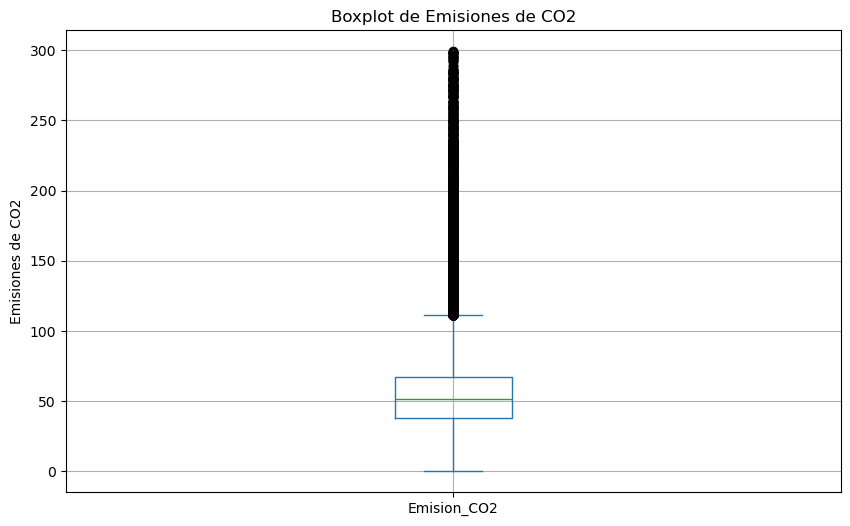

In [ ]:

plt.figure(figsize=(10, 6))
df_sinanio['Emision_CO2'].plot(kind='box')
plt.title('Boxplot de Emisiones de CO2')
plt.ylabel('Emisiones de CO2')
plt.grid(True)
plt.show()

El boxplot de emisiones de CO₂ revela la distribución, variabilidad y valores atípicos de los datos. La mediana indica el valor central, mientras que el rango intercuartílico (caja) muestra la dispersión. Los valores atípicos (puntos fuera de los bigotes) sugieren emisiones excepcionalmente altas o bajas. La forma del gráfico también puede indicar asimetría en los datos. Esto es útil para identificar patrones, evaluar impactos ambientales y diseñar políticas de reducción de emisiones.

En esencia: El gráfico ayuda a entender cómo se distribuyen las emisiones, destacando tendencias centrales, variaciones y casos extremos para un análisis más efectivo.

In [75]:
# Conteo de la clasificación de emisiones
clasificacion_counts = df_sinanio['Clasificacion_Emisiones'].value_counts()

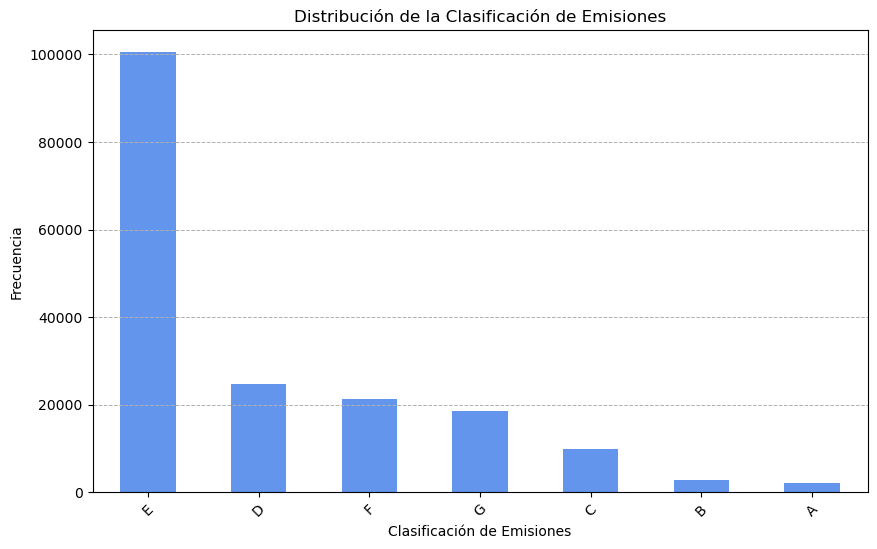

In [76]:
# Gráfico de barras para Clasificacion_Emisiones
plt.figure(figsize=(10, 6))
clasificacion_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Distribución de la Clasificación de Emisiones')
plt.xlabel('Clasificación de Emisiones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [41]:
# Conteo de la clasificación de consumo
clasificacion_consumo_counts = df_sinanio['Clasificacion_consumo'].value_counts()

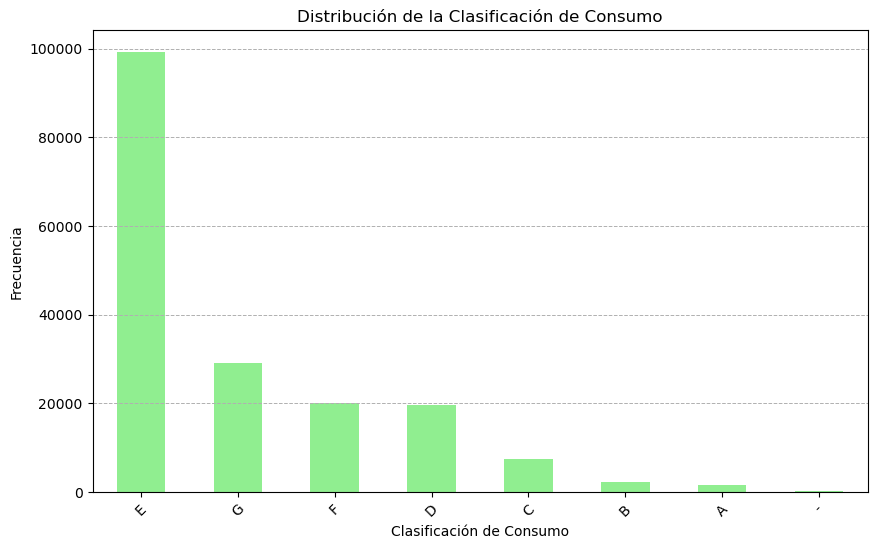

In [42]:
# Gráfico de barras para Clasificacion_consumo
plt.figure(figsize=(10, 6))
clasificacion_consumo_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de la Clasificación de Consumo')
plt.xlabel('Clasificación de Consumo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [43]:
# Conteo de los tipos de edificio
tipo_edificio_counts = df_sinanio['Tipo_edificio'].value_counts()

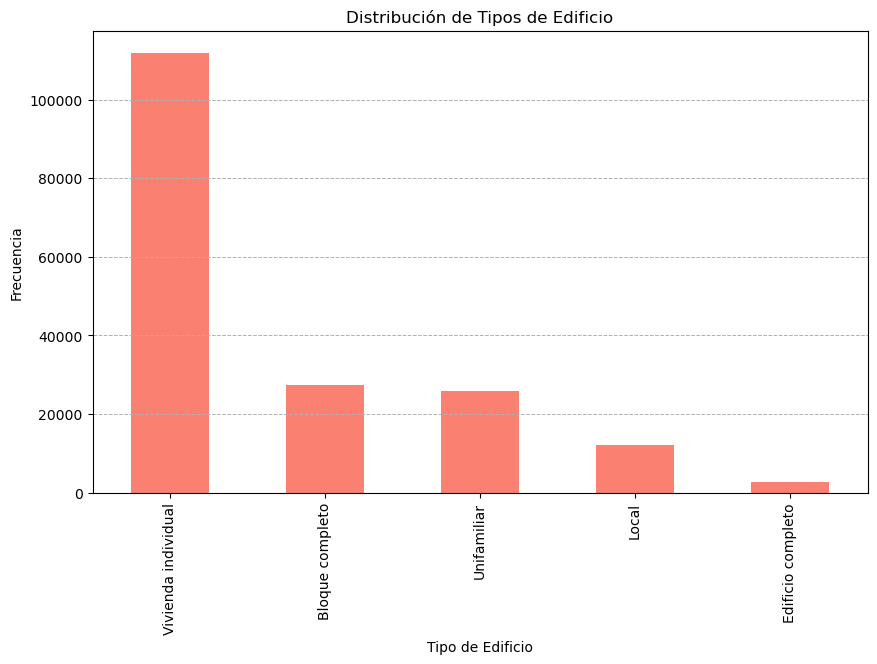

In [44]:
# Gráfico de barras para Tipo_edificio
plt.figure(figsize=(10, 6))
tipo_edificio_counts.plot(kind='bar', color='salmon')
plt.title('Distribución de Tipos de Edificio')
plt.xlabel('Tipo de Edificio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Puede ser necesario rotar las etiquetas para mejor legibilidad
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [45]:
# Conteo de los estados de edificio
estado_edificio_counts = df_sinanio['Estado_edificio'].value_counts()

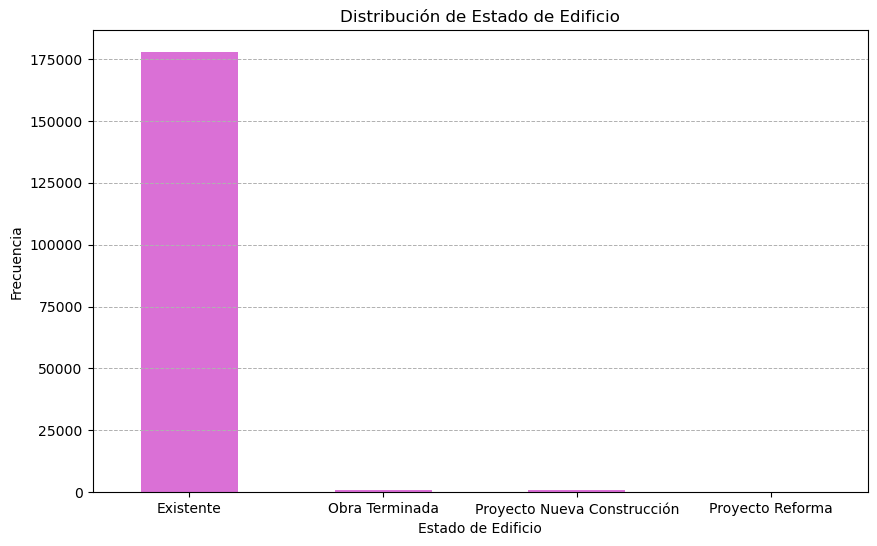

In [46]:
# Gráfico de barras para Estado_edificio
plt.figure(figsize=(10, 6))
estado_edificio_counts.plot(kind='bar', color='orchid')
plt.title('Distribución de Estado de Edificio')
plt.xlabel('Estado de Edificio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Ajusta la rotación si es necesario
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [47]:
# Asegurarse de que la columna de fecha está en formato datetime en el DataFrame filtrado
df_sinanio['Fecha_emision'] = pd.to_datetime(df_sinanio['Fecha_emision'])

In [48]:
# Crear un DataFrame agrupado por año de emisión y calcular la mediana de emisiones de CO2
df_emision_anual_mediana_filtrado = df_sinanio.groupby(df_sinanio['Fecha_emision'].dt.year)['Emision_CO2'].median().reset_index()

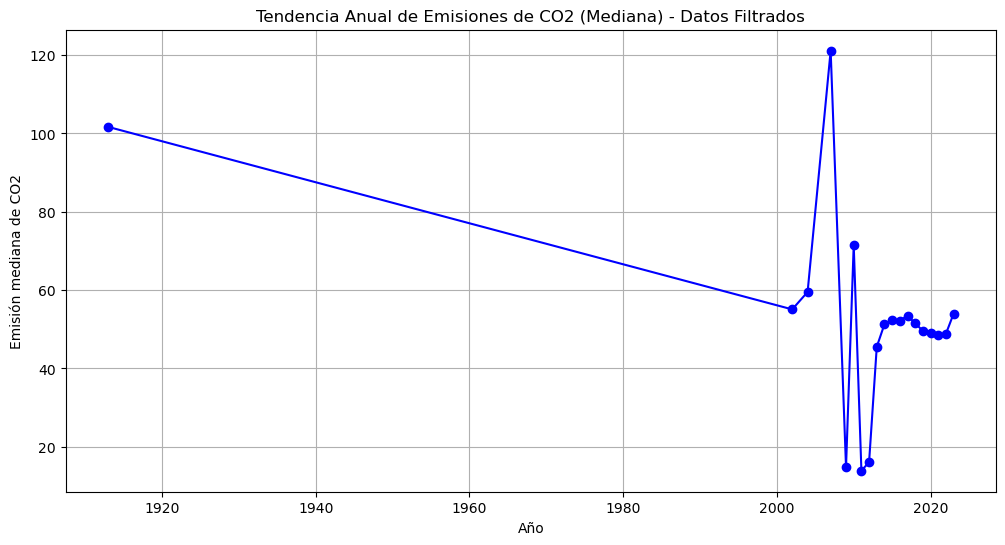

In [49]:
# Gráfico de líneas para la tendencia de emisiones de CO2 a lo largo del tiempo usando la mediana
plt.figure(figsize=(12, 6))
plt.plot(df_emision_anual_mediana_filtrado['Fecha_emision'], df_emision_anual_mediana_filtrado['Emision_CO2'], marker='o', linestyle='-', color='blue')
plt.title('Tendencia Anual de Emisiones de CO2 (Mediana) - Datos Filtrados')
plt.xlabel('Año')
plt.ylabel('Emisión mediana de CO2')
plt.grid(True)
plt.show()

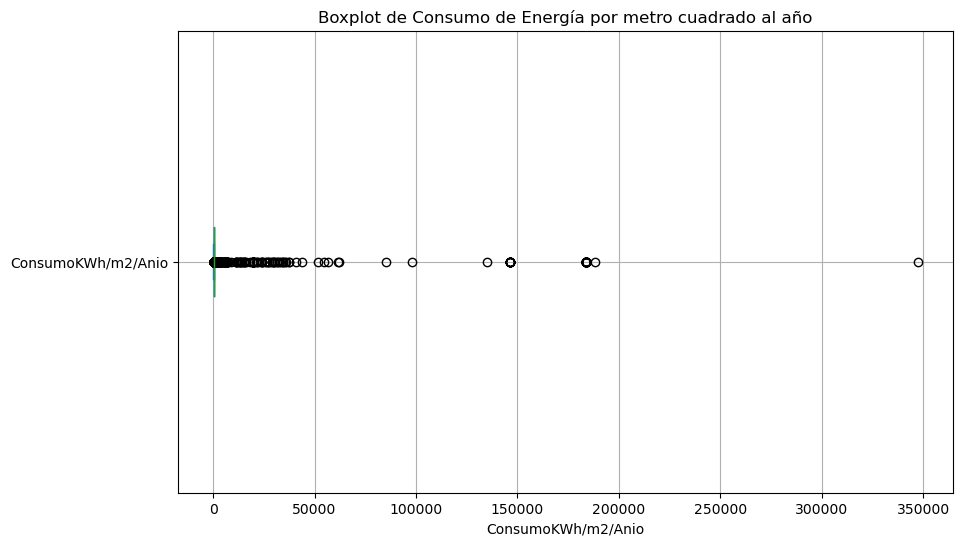

In [50]:
# Boxplot para ConsumoKWh/m2/Anio
plt.figure(figsize=(10, 6))
df_sinanio['ConsumoKWh/m2/Anio'].plot(kind='box', vert=False)
plt.title('Boxplot de Consumo de Energía por metro cuadrado al año')
plt.xlabel('ConsumoKWh/m2/Anio')
plt.grid(True)
plt.show()

El diagrama de caja generado para la variable ConsumoKWh/m2/Año revela una notable presencia de valores atípicos, lo que sugiere una alta variabilidad en el consumo energético por metro cuadrado anualmente.

Este tipo de visualización resulta especialmente útil para detectar posibles valores extremos que podrían requerir un análisis más detallado. En este caso, se observan consumos significativamente elevados en comparación con la mediana, lo que indica que podría ser necesario aplicar un filtro similar al utilizado con Emision_CO2 o profundizar en la investigación de estos casos específicos.

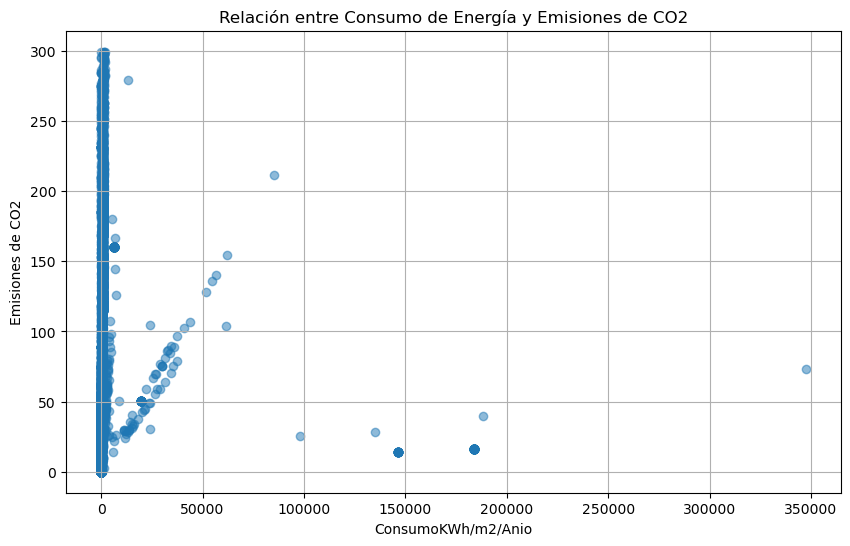

In [51]:
# Gráfico de dispersión para ConsumoKWh/m2/Anio vs Emision_CO2
plt.figure(figsize=(10, 6))
plt.scatter(df_sinanio['ConsumoKWh/m2/Anio'], df_sinanio['Emision_CO2'], alpha=0.5)
plt.title('Relación entre Consumo de Energía y Emisiones de CO2')
plt.xlabel('ConsumoKWh/m2/Anio')
plt.ylabel('Emisiones de CO2')
plt.grid(True)
plt.show()

El diagrama de dispersión evidencia una alta densidad de observaciones en los rangos inferiores tanto del ConsumoKWh/m²/Año como de la Emisión_CO2, lo que sugiere que la mayoría de las unidades analizadas presentan niveles relativamente bajos en ambas variables. No obstante, se observa la presencia de puntos aislados hacia los valores superiores del eje de consumo energético, los cuales no están necesariamente acompañados por incrementos proporcionales en las emisiones de CO2. Estos casos podrían corresponder a observaciones atípicas o escenarios particulares que ameritan una evaluación más profunda.

Con el fin de examinar con mayor claridad la relación entre ambas variables, se recomienda restringir el dominio del gráfico a un intervalo más representativo o aplicar transformaciones estadísticas —como una escala logarítmica— que permitan una mejor visualización de la estructura subyacente de los datos. Adicionalmente, el cálculo del coeficiente de correlación de Pearson permitirá cuantificar el grado y la dirección de la relación lineal entre ConsumoKWh/m²/Año y Emisión_CO2. Este coeficiente, que oscila entre -1 y 1, proporciona una medida robusta de la asociación lineal: valores cercanos a los extremos indican una relación lineal fuerte (positiva o negativa), mientras que valores próximos a cero sugieren ausencia de asociación lineal significativa.

In [52]:
# Calculamos la correlación de Pearson
correlacion = df_sinanio[['ConsumoKWh/m2/Anio', 'Emision_CO2']].corr()

correlacion

,ConsumoKWh/m2/Anio,Emision_CO2
ConsumoKWh/m2/Anio,1.000000,0.013808
Emision_CO2,0.013808,1.000000


La matriz de correlación revela que la relación lineal entre ConsumoKWh/m²/Año y Emisión_CO2 es prácticamente nula, con un coeficiente de correlación cercano a cero. Esto sugiere la ausencia de una asociación lineal significativa entre ambas variables dentro del conjunto de datos actualmente filtrado. Tal resultado podría atribuirse a diversos factores, como la estructura inherente de los datos, la presencia de valores atípicos residuales o, simplemente, a la inexistencia de una relación lineal directa entre estas dos medidas.

A fin de explorar con mayor precisión una posible relación subyacente, se procederá a aplicar un filtrado adicional sobre la variable ConsumoKWh/m²/Año, siguiendo la misma estrategia utilizada previamente para Emisión_CO2. Este paso permitirá reducir la influencia de valores extremos y evaluar si, dentro de un rango más acotado y representativo, emerge algún patrón de asociación más claro entre ambas variables.

In [53]:
# Calculamos los cuartiles y el rango intercuartílico (IQR)
Q1 = df_sinanio['ConsumoKWh/m2/Anio'].quantile(0.25)
Q3 = df_sinanio['ConsumoKWh/m2/Anio'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los datos para remover los valores atípicos
df_filtrado_sin_atipicos = df_sinanio[(df_sinanio['ConsumoKWh/m2/Anio'] >= limite_inferior) & 
                                        (df_sinanio['ConsumoKWh/m2/Anio'] <= limite_superior)]

In [54]:
# Mostramos la descripción de la columna filtrada para verificar
df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'].describe()

count    173337.000000
mean        245.901890
std          97.862883
min           0.000000
25%         177.420000
50%         237.650000
75%         306.820000
max         523.220000
Name: ConsumoKWh/m2/Anio, dtype: float64

Tras aplicar el filtrado a la variable ConsumoKWh/m²/Año, se han eliminado los valores atípicos, lo que ha resultado en un conjunto de datos más homogéneo y estadísticamente consistente. Esta depuración ha permitido reducir la desviación estándar, reflejando una menor dispersión en torno a la media, y ha acotado el rango de los valores observados, lo que sugiere una mejora en la calidad del conjunto de datos para análisis posteriores.

La eliminación de extremos facilita una interpretación más robusta de los patrones subyacentes y disminuye el riesgo de sesgos inducidos por observaciones anómalas. Este nuevo conjunto más refinado proporciona un marco más apropiado para explorar posibles asociaciones entre ConsumoKWh/m²/Año y otras variables de interés, incluyendo Emisión_CO2.

In [56]:
# Calculamos la correlación de Pearson en el conjunto de datos filtrado
correlacion_filtrada = df_filtrado_sin_atipicos[['ConsumoKWh/m2/Anio', 'Emision_CO2']].corr()

correlacion_filtrada

,ConsumoKWh/m2/Anio,Emision_CO2
ConsumoKWh/m2/Anio,1.000000,0.886134
Emision_CO2,0.886134,1.000000


En esta ocasión, el análisis de correlación muestra un coeficiente elevado entre ConsumoKWh/m²/Año y Emisión_CO2, lo que evidencia una fuerte relación lineal positiva dentro del conjunto de datos filtrado. Este resultado indica que, en términos generales, un incremento en el consumo energético por metro cuadrado anual se asocia con un aumento proporcional en las emisiones de CO2, y viceversa.

Dado que se ha identificado una asociación lineal significativa entre ambas variables, resulta pertinente representarla gráficamente mediante un diagrama de dispersión. Para reforzar esta visualización y facilitar la interpretación, es recomendable superponer una recta de regresión lineal, la cual permitirá ilustrar de forma clara la dirección y magnitud de la relación observada.

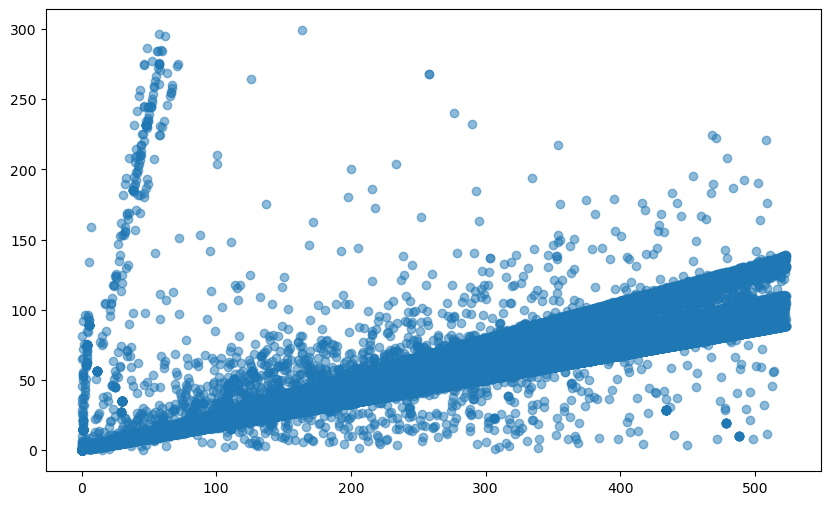

In [57]:
# Gráfico de dispersión para ConsumoKWh/m2/Anio vs Emision_CO2
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'], df_filtrado_sin_atipicos['Emision_CO2'], alpha=0.5)

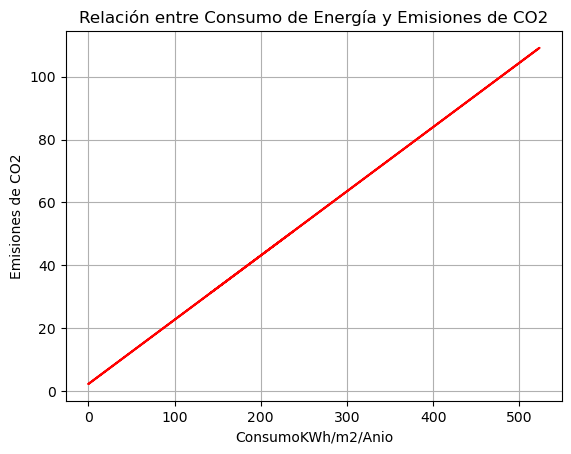

In [58]:
# Ajustamos una línea de tendencia lineal
m, b = np.polyfit(df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'], df_filtrado_sin_atipicos['Emision_CO2'], 1)
plt.plot(df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'], m*df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'] + b, color='red')

plt.title('Relación entre Consumo de Energía y Emisiones de CO2')
plt.xlabel('ConsumoKWh/m2/Anio')
plt.ylabel('Emisiones de CO2')
plt.grid(True)
plt.show()

El gráfico de dispersión actualizado evidencia de forma clara la fuerte asociación lineal entre ConsumoKWh/m²/Año y Emisión_CO2. La línea roja superpuesta corresponde a la recta de tendencia, la cual respalda visualmente el alto coeficiente de correlación obtenido previamente.

La distribución de los puntos y la orientación de la línea de ajuste sugieren que, en términos generales, a mayor consumo energético por metro cuadrado al año, corresponden mayores niveles de emisiones de CO2. Este comportamiento resulta coherente desde una perspectiva práctica, ya que un incremento en el uso de energía suele implicar una mayor generación de gases contaminantes.

## Visualizaciones Avanzadas

C:\Users\Pedro Yacila\AppData\Local\Temp\ipykernel_10824\1591767010.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'], shade=True)


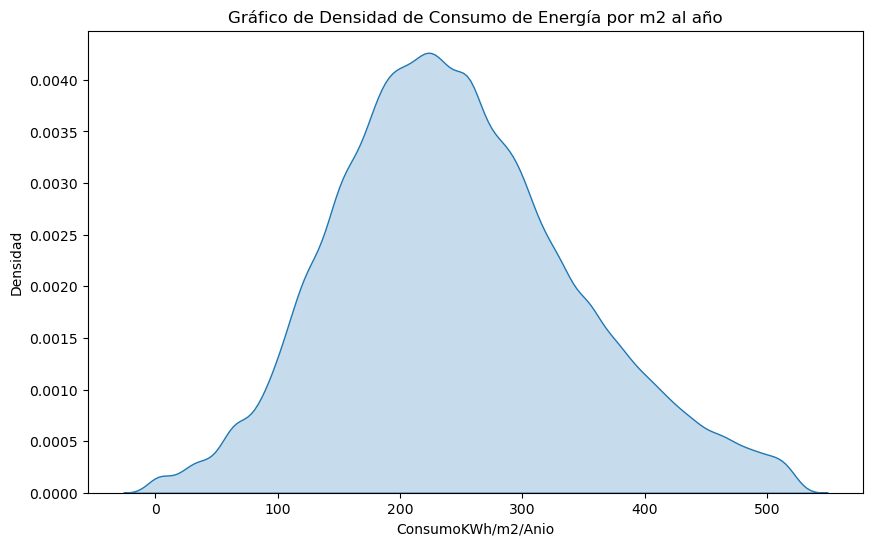

In [59]:
import seaborn as sns

# Gráfico de densidad para ConsumoKWh/m2/Anio
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtrado_sin_atipicos['ConsumoKWh/m2/Anio'], shade=True)
plt.title('Gráfico de Densidad de Consumo de Energía por m2 al año')
plt.xlabel('ConsumoKWh/m2/Anio')
plt.ylabel('Densidad')
plt.show()

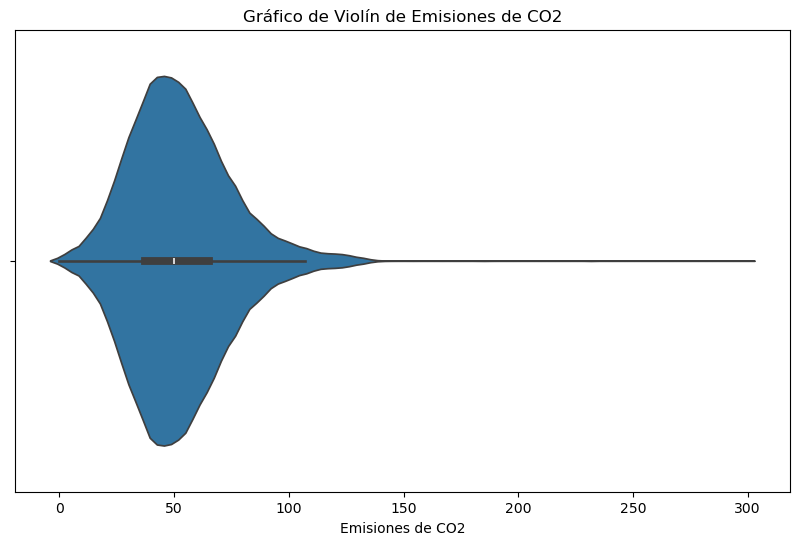

In [60]:
# Gráfico de violín para Emision_CO2
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_filtrado_sin_atipicos['Emision_CO2'])
plt.title('Gráfico de Violín de Emisiones de CO2')
plt.xlabel('Emisiones de CO2')
plt.show()

El gráfico de violín ilustra la distribución de las emisiones de CO2, incorporando la estimación de densidad junto con los cuartiles centrales. La expansión en la parte inferior del gráfico indica una alta concentración de observaciones con niveles bajos de emisiones de CO2.

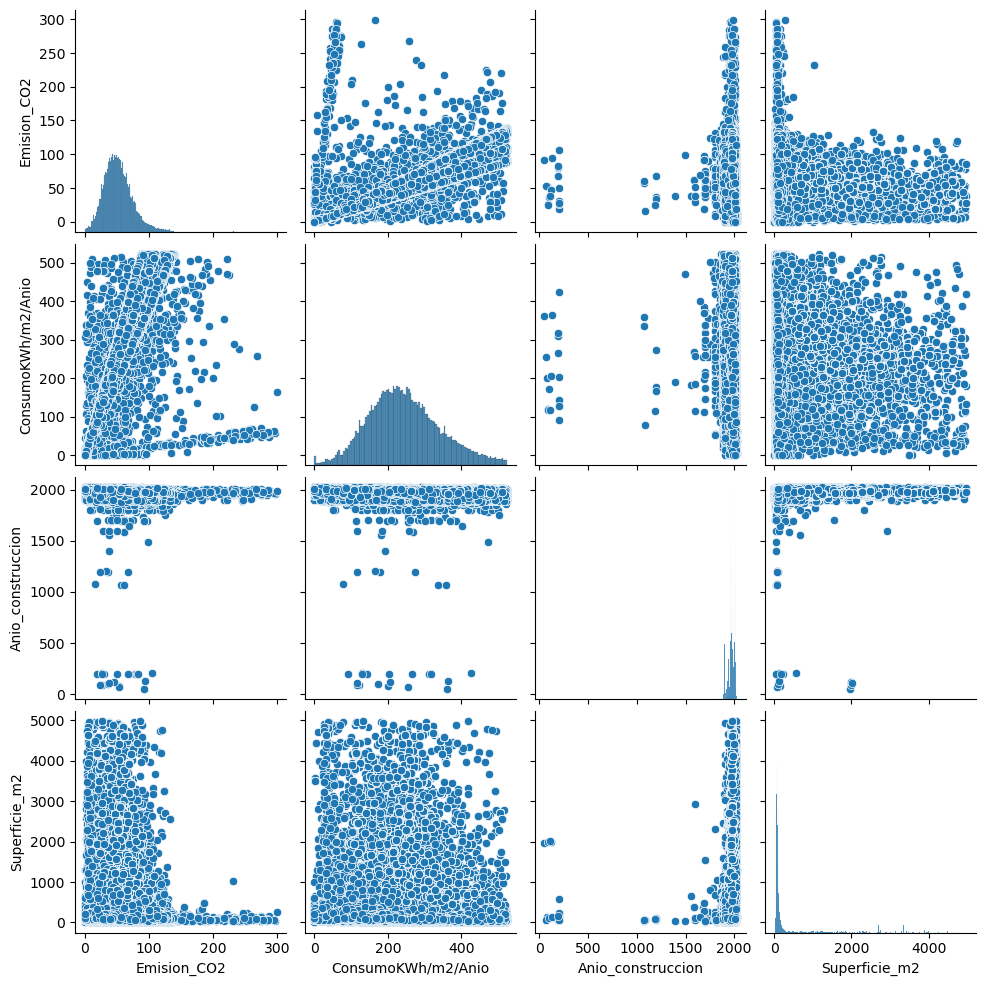

In [61]:
import seaborn as sns
variables_de_interes = ['Emision_CO2', 'ConsumoKWh/m2/Anio', 'Anio_construccion', 'Superficie_m2']
sns.pairplot(df_filtrado_sin_atipicos[variables_de_interes])
plt.show()

### **CONCLUSIONES**

#### **Asociación entre Consumo Energético y Emisiones de CO2:**
Se identificó una correlación lineal significativa entre el consumo energético y las emisiones de CO2, lo que sugiere que intervenciones orientadas a la reducción del consumo energético podrían tener un impacto directo y positivo en la mitigación de emisiones contaminantes.

#### **Relevancia de la Antigüedad del Edificio:**
El año de construcción no mostró una relación estadísticamente significativa con el consumo energético ni con las emisiones de CO2. Esto indica que variables como la calidad del mantenimiento, las renovaciones estructurales y la adopción de tecnologías eficientes podrían ejercer una mayor influencia sobre el rendimiento energético de un inmueble que su antigüedad per se.

#### **Heterogeneidad entre Edificaciones:**
Se observó una alta dispersión en los niveles de consumo y emisión entre edificios, lo que evidencia una diversidad en cuanto a uso, eficiencia de los sistemas energéticos, técnicas constructivas y hábitos operacionales, reflejando así un entorno urbano heterogéneo desde el punto de vista energético.

#### **Tratamiento de Valores Atípicos:**
La presencia inicial de valores atípicos en las variables Emisión_CO2 y ConsumoKWh/m²/Año distorsionaba la interpretación general. La depuración de estos casos permitió obtener una visión más representativa del comportamiento central de los datos, facilitando un análisis más robusto y confiable.

#### **Superficie del Edificio y su Influencia:**
No se evidenció una asociación fuerte entre el área construida y las variables de consumo o emisión, lo que sugiere que el tamaño de la edificación, por sí solo, no constituye un buen predictor de eficiencia energética o impacto ambiental.

#### **Análisis de Patrones Temporales:**

No se identificaron tendencias temporales claras en las emisiones de CO2 a partir de las visualizaciones iniciales. Esto podría deberse a inconsistencias en los registros temporales o a la necesidad de un análisis más granular que contemple políticas energéticas, cambios regulatorios o mejoras tecnológicas a lo largo del tiempo.

#### **Comportamiento de las Distribuciones:**
Las distribuciones unimodales observadas en las variables Emisión_CO2 y ConsumoKWh/m²/Año indican que la mayoría de los edificios se agrupan en torno a niveles similares de eficiencia energética, mientras que los casos extremos representan una minoría con comportamientos divergentes.

